<a href="https://colab.research.google.com/github/sanadv/MLCourse/blob/main/Lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# y = 5+4x
# Data
X = np.array([100, 101, 105, 104, 111, 112, 104, 103, 100]).reshape(-1, 1)
Y = np.array([405, 409, 425, 421, 449, 453, 421, 417, 405])




# Creating the model
model = LinearRegression()
model.fit(X, Y)

# New array of X values for which predictions are needed
new_X_values = np.array([107, 110, 115]).reshape(-1, 1)

# Making predictions for the new X values
new_Y_predictions = model.predict(new_X_values)

# Making predictions for plotting
X_new = np.linspace(100, 115, 50).reshape(-1, 1)  # Creating new values for a smoother line
Y_pred = model.predict(X_new)

# Plotting
plt.scatter(X, Y, color='blue', label='Actual data')
plt.scatter(new_X_values, new_Y_predictions, color='green', marker='o', label='New predictions')
plt.plot(X_new, Y_pred, color='red', label='Regression line')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Output the coefficients
print("Slope:", model.coef_[0])
print("Intercept:", model.intercept_)

# Display new predictions
for i, (x_val, y_pred) in enumerate(zip(new_X_values, new_Y_predictions)):
    print(f"Predicted Y for X={x_val[0]}: {y_pred:.2f}")


R^2 Score: 0.9271098389904927


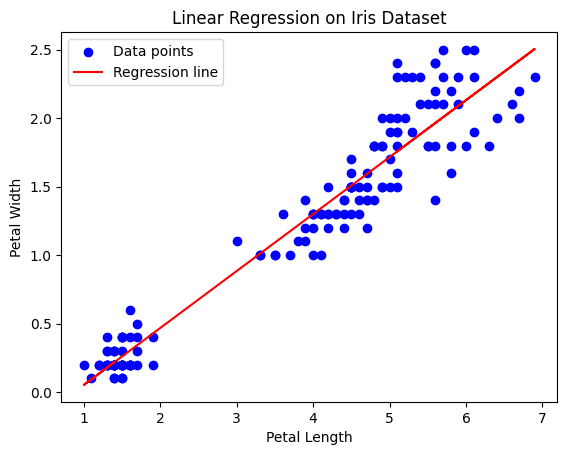

In [ ]:
#3.1  Linear Regression
import numpy as np
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2]  # Petal length
y = iris.data[:, 3]  # Petal width
# Print a sample of the dataset
print("Sample data from the Iris dataset:")
print("Petal Length - Petal Width")
for i in range(5):  # print first 5 samples
    print(f"{X[i]} - {y[i]}")
# Function to fit the linear regression model
def linear_regression(X, y):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    theta_best = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
    return theta_best

# Predict function based on our model
def predict(X, theta_best):
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X_bias.dot(theta_best)

# R-squared (R^2) score function
def r_squared(y_true, y_pred):
    total_variance = np.sum((y_true - np.mean(y_true))**2)
    explained_variance = np.sum((y_true - y_pred)**2)
    return 1 - (explained_variance / total_variance)

# Fit the model
theta_best = linear_regression(X, y)

# Predictions for the entire dataset
y_pred = predict(X, theta_best)

# Calculate R^2 score
r2_score = r_squared(y, y_pred)
print(f"R^2 Score: {r2_score}")

# Visualizing the linear regression line
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Linear Regression on Iris Dataset')
plt.legend()
plt.show()



 NumPy Functions and Their Usage

1. `np.ones(shape, dtype=None, order='C')`:
   - Creates a new array filled with ones.
   - `shape`: Integer or sequence of integers indicating the shape of the new array.
   - `dtype`: Optional. The desired data-type for the array. Default is `float`.
   - `order`: Optional. Whether to store multi-dimensional data in row-major (C-style) or column-major (Fortran-style) order in memory.

2. `np.c_[...]`:
   - Translates slice objects to concatenation along the second axis. It is a shorthand for `np.concatenate` but specifically for column-stacking.
   - This is used to add a column of ones to `X` for the bias term in the linear regression model.

3. `np.linalg.inv(a)`:
   - Computes the (multiplicative) inverse of a matrix.
   - `a`: Square matrix to be inverted.
   - Note: The matrix must be square and non-singular.

4. `dot()`:
   - Dot product of two arrays. For 2-D vectors, it is equivalent to matrix multiplication, and for 1-D vectors, it is the inner product of the vectors.
   - This function is used for matrix multiplication in the process of calculating the regression coefficients and for predictions.

5. `np.sum(a, axis=None, dtype=None, out=None, keepdims=<no value>, initial=<no value>, where=<no value>)`:
   - Sum of array elements over a given axis.
   - `a`: Array containing elements to sum.
   - `axis`: Axis or axes along which a sum is performed. Default is `None`, resulting in the sum of all elements.
   - `dtype`: The type of the returned array and of the accumulator in which the elements are summed.

Learning Process (Model Training)

The learning process in this linear regression model involves calculating the best-fit line that predicts the dependent variable (petal width) from the independent variable (petal length). The process follows these steps:

1. Preparation of Input Data (`X`) and Output Data (`y`): The input (`X`) is petal length, and the output (`y`) is petal width from the Iris dataset. A column of ones is added to `X` to accommodate the intercept term (\(\beta_0\)) in the regression equation.

2. Calculation of Coefficients beta: The coefficients are calculated using the Normal Equation, theta = (X^TX)^{-1}X^Ty, where theta is the vector of coefficients beta_0, beta_1, X is the input data matrix with a column of ones, and y is the output data vector. This equation finds the values of theta that minimize the cost function.

Prediction Process

With the coefficients calculated, predictions can be made for new or existing input data by applying the formula y = X theta, where X is the input data (with a column of ones for the intercept) and theta is the vector of coefficients. This is essentially a dot product between each row of `X` and the coefficients `theta_best`, resulting in the predicted petal width.

R-squared (R^2) Score Calculation

The (R^2) score is calculated to evaluate the performance of the model, representing the proportion of variance in the dependent variable that is predictable from the independent variable:

- Total Variance: The total variance in the dependent variable is calculated as the sum of squared differences between each actual value and the mean of all dependent variable values.
- Explained Variance: The explained variance is the sum of squared differences between the actual and predicted values.
- (R^2) Score: The (R^2) score is then 1 minus the ratio of explained variance to total variance, indicating the proportion of the dependent variable's variance that is explained by the model.

This documentation outlines the key components and processes involved in the linear regression model applied to the Iris dataset. Understanding these elements and how they work together is crucial for effectively implementing and interpreting linear regression models.

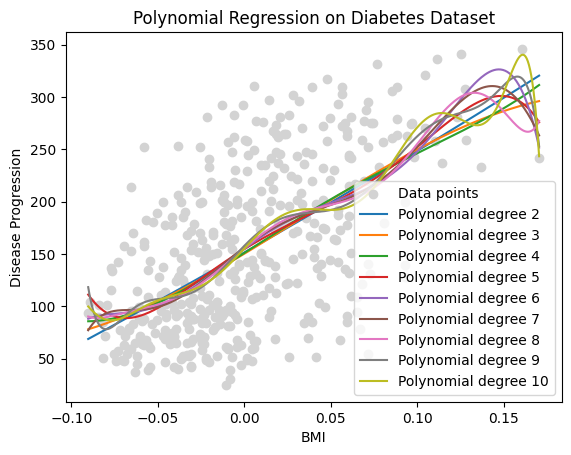

Degree 2 polynomial MSE: 3889.702145270231
Degree 3 polynomial MSE: 3883.351178536732
Degree 4 polynomial MSE: 3880.546405234364
Degree 5 polynomial MSE: 3858.093602575701
Degree 6 polynomial MSE: 3842.441684223601
Degree 7 polynomial MSE: 3838.721313700728
Degree 8 polynomial MSE: 3833.126727718769
Degree 9 polynomial MSE: 3806.701012477206
Degree 10 polynomial MSE: 3794.198278040248


In [ ]:
# 3.2 Polynomial Regression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # Body mass index (BMI)
y = diabetes.target  # Quantitative measure of disease progression

# Generate polynomial features function
def generate_polynomial_features(x, degree):
    n = x.shape[0]
    features = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        features[:, d] = x ** d
    return features

# Normal equation function
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# Predict function
def predict(X, theta):
    return X.dot(theta)

# Trying different degrees of polynomial to see which fits better
degrees = [2, 3, 4, 5,6,7,8,9,10]
models = []
predictions = []
mse_scores = []

# Generate a range for plotting predictions
X_range = np.linspace(X.min(), X.max(), 400)

# Model fitting for different degrees and store predictions
for degree in degrees:
    X_poly = generate_polynomial_features(X, degree)
    theta = normal_equation(X_poly, y)
    models.append((degree, theta))
    y_pred = predict(X_poly, theta)  # Predict on the training data for MSE calculation
    predictions.append(y_pred)
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)


# Plotting the original data points
plt.scatter(X, y, color='lightgray', label='Data points')

# Plotting predictions for each model
for degree, theta in models:
    X_range_poly = generate_polynomial_features(X_range, degree)
    y_range_pred = predict(X_range_poly, theta)
    plt.plot(X_range, y_range_pred, label=f'Polynomial degree {degree}')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Polynomial Regression on Diabetes Dataset')
plt.legend()
plt.show()


# Print MSE scores
for degree, mse in zip(degrees, mse_scores):
    print(f'Degree {degree} polynomial MSE: {mse}')






Libraries Used:

1. numpy: A fundamental package for scientific computing with Python. It provides support for arrays, mathematical functions, random number generation, and much more.
2. matplotlib.pyplot: A collection of functions that make matplotlib work like MATLAB. It is used here for creating visualizations such as scatter plots and line plots.
3. sklearn.datasets: Part of scikit-learn, a machine learning library. The `load_diabetes` function is used to load the standard Diabetes dataset.
4. sklearn.metrics: Also part of scikit-learn, this module includes score functions, performance metrics, and pairwise metrics. The `mean_squared_error` function is used to calculate the MSE.

Functions and Their Roles:

1. load_diabetes(): Loads the Diabetes dataset, which is a standard dataset within the scikit-learn library. This dataset is used to demonstrate the concept of regression.

2. generate_polynomial_features(x, degree):
   - Parameters:
     - `x`: Input array containing the feature values.
     - `degree`: The degree of the polynomial features to generate.
   - Role: Generates polynomial features for a single feature `x`. For example, if `x` is BMI and `degree` is 2, it generates features for BMI and BMI^2.

3. normal_equation(X, y):
   - Parameters:
     - `X`: Input matrix of features, where each row represents a sample and each column represents a feature.
     - `y`: Output array containing the target values.
   - Role: Computes the coefficients (parameters) of the linear regression model by using the normal equation. The normal equation is a method of solving for the optimum parameter set when the cost function is convex.

4. predict(X, theta):
   - Parameters:
     - `X`: Input matrix of features.
     - `theta`: The parameters/coefficients of the regression model.
   - Role: Predicts the target values using the learned parameters `theta` and the input features `X`.

5. mean_squared_error(y_true, y_pred):
   - Parameters:
     - `y_true`: True target values.
     - `y_pred`: Predicted target values by the regression model.
   - Role: Calculates the Mean Squared Error between the true and predicted values, a common metric to evaluate regression models.

The Training Process:

1. Data Preparation: The `X` and `y` variables are created from the Diabetes dataset, with `X` representing the feature (BMI) and `y` representing the target (disease progression).

2. Feature Generation: Polynomial features of varying degrees are generated from `X` to capture non-linear relationships.

3. Model Fitting: For each set of polynomial features, the normal equation is used to compute the model parameters that minimize the cost function.

The Prediction Process:

1. Prediction Range Definition: A range of values (`X_range`) is defined for making predictions using the fitted model.

2. Prediction Generation: The `predict` function is used with the generated polynomial features and the model parameters to make predictions over the defined range.

Visualization:

- A scatter plot is used to display the original data points, and line plots are used to show the fitted polynomial regression lines for each degree.

Model Evaluation:

- The MSE is calculated for each model, giving an indication of how well each polynomial degree fits the data.

Alternatives and Considerations:

- Regularization: The code could be extended to include regularization (Ridge or Lasso) to prevent overfitting, especially for higher polynomial degrees.
- Cross-Validation: Implementing cross-validation could help determine the most suitable polynomial degree and ensure that the model generalizes well.
- Feature Scaling: Standardizing or normalizing the features before fitting the model could improve model performance, although it is not included in this code.
- Alternative Models: Depending on the nature of the dataset, other regression models (like decision trees or neural networks) might be more suitable.

Output:

- The final output includes a plot of the dataset with polynomial regression lines and printed MSE values for each polynomial degree, providing insights into model performance.

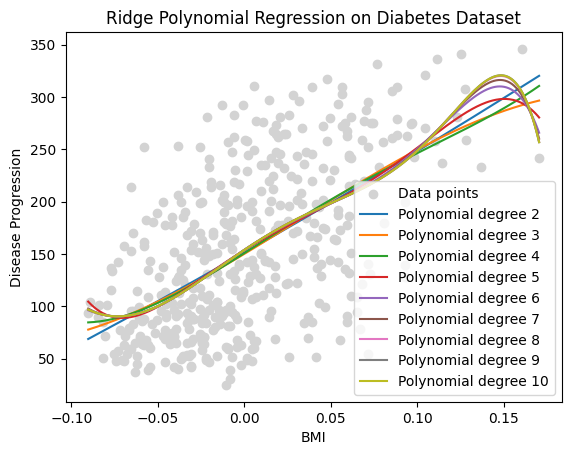

Degree 2 Ridge polynomial MSE: 3889.73
Degree 3 Ridge polynomial MSE: 3883.39
Degree 4 Ridge polynomial MSE: 3880.62
Degree 5 Ridge polynomial MSE: 3859.14
Degree 6 Ridge polynomial MSE: 3848.14
Degree 7 Ridge polynomial MSE: 3848.06
Degree 8 Ridge polynomial MSE: 3848.28
Degree 9 Ridge polynomial MSE: 3848.42
Degree 10 Ridge polynomial MSE: 3848.40


In [ ]:
#3.3 Ridge Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # Body mass index (BMI)
y = diabetes.target  # Quantitative measure of disease progression

# Generate polynomial features function
def generate_polynomial_features(x, degree):
    n = x.shape[0]
    features = np.ones((n, degree + 1))
    for d in range(1, degree + 1):
        features[:, d] = x ** d
    return features

# Ridge regression function
def ridge_regression(X, y, alpha):
    m, n = X.shape
    I = np.eye(n)
    return np.linalg.inv(X.T.dot(X) + alpha * I).dot(X.T).dot(y)

# Predict function
def predict(X, theta):
    return X.dot(theta)

# Dictionary to store scalers for each degree
scalers = {}

# Trying different degrees of polynomial to see which fits better
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
models = []

# Generate a range for plotting predictions
X_range = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

for degree in degrees:
    # Generate polynomial features
    X_poly = generate_polynomial_features(X, degree)
    # Initialize StandardScaler
    scaler = StandardScaler()
    # Fit the scaler and transform the features, excluding the bias term for scaling
    X_poly_scaled = scaler.fit_transform(X_poly[:, 1:])
    # Add the bias term back after scaling
    X_poly_scaled_with_bias = np.c_[np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled]
    # Store the scaler with the degree as the key
    scalers[degree] = scaler
    # Fit the Ridge Regression model
    theta = ridge_regression(X_poly_scaled_with_bias, y, alpha=0.5)
    models.append((degree, theta))
    # Predict and calculate MSE on the scaled training data with bias term
    y_pred_scaled = predict(X_poly_scaled_with_bias, theta)
    mse = mean_squared_error(y, y_pred_scaled)
    mse_scores.append(mse)
# Plotting the original data points
plt.scatter(X, y, color='lightgray', label='Data points')

# Plotting predictions for each model
for degree, theta in models:
    # Generate polynomial features for the plotting range without the bias term
    X_range_poly = generate_polynomial_features(X_range.flatten(), degree)[:, 1:]
    # Transform the features using the corresponding scaler
    X_range_poly_scaled = scalers[degree].transform(X_range_poly)
    # Add the bias term back after scaling
    X_range_poly_scaled_with_bias = np.c_[np.ones((X_range_poly_scaled.shape[0], 1)), X_range_poly_scaled]
    # Predict using the Ridge Regression model
    y_range_pred_scaled = predict(X_range_poly_scaled_with_bias, theta)
    # Plot the model predictions
    plt.plot(X_range, y_range_pred_scaled, label=f'Polynomial degree {degree}')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Ridge Polynomial Regression on Diabetes Dataset')
plt.legend()
plt.show()

# Print MSE scores
for degree, theta in models:
    # Generate polynomial features for the degree without the bias term
    X_poly = generate_polynomial_features(X, degree)[:, 1:]
    # Transform the features using the corresponding scaler
    X_poly_scaled = scalers[degree].transform(X_poly)
    # Add the bias term back after scaling
    X_poly_scaled_with_bias = np.c_[np.ones((X_poly_scaled.shape[0], 1)), X_poly_scaled]
    # Predict using the Ridge Regression model
    y_pred_scaled = predict(X_poly_scaled_with_bias, theta)
    # Calculate MSE
    mse = mean_squared_error(y, y_pred_scaled)
    # Print MSE
    print(f'Degree {degree} Ridge polynomial MSE: {mse:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.506e+05, tolerance: 2.621e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.909e+05, tolerance: 2.621e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.941e+05, tolerance: 2.621e

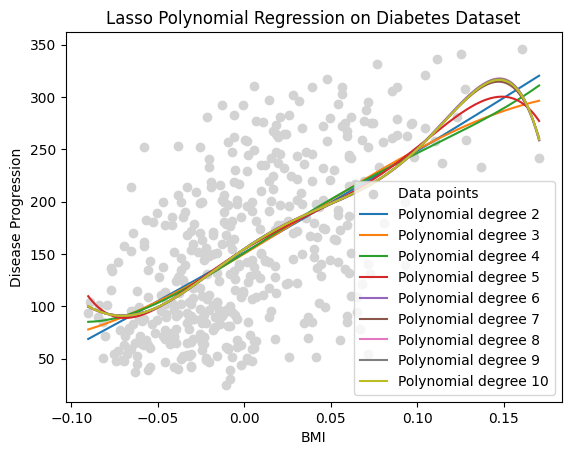

Degree 2 Lasso polynomial MSE: 3889.70
Degree 3 Lasso polynomial MSE: 3883.35
Degree 4 Lasso polynomial MSE: 3880.56
Degree 5 Lasso polynomial MSE: 3858.15
Degree 6 Lasso polynomial MSE: 3845.59
Degree 7 Lasso polynomial MSE: 3846.29
Degree 8 Lasso polynomial MSE: 3846.54
Degree 9 Lasso polynomial MSE: 3846.61
Degree 10 Lasso polynomial MSE: 3846.86


In [ ]:
# 3.4 Lasso Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data[:, 2]  # Body mass index (BMI)
y = diabetes.target  # Quantitative measure of disease progression

# Initialize list to store models and MSE scores
models = []
mse_scores = []

# Fit models for different degrees of polynomial features
degrees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for degree in degrees:
    # Create a pipeline that generates polynomial features, scales them and then applies Lasso
    model = make_pipeline(PolynomialFeatures(degree, include_bias=False),
                          StandardScaler(),
                          Lasso(alpha=0.01, max_iter=1000))
    model.fit(X.reshape(-1, 1), y)
    models.append(model)

    # Predict and calculate MSE on the training data
    y_pred = model.predict(X.reshape(-1, 1))
    mse = mean_squared_error(y, y_pred)
    mse_scores.append(mse)

# Generate a range for plotting predictions
X_range = np.linspace(X.min(), X.max(), 400).reshape(-1, 1)

# Plotting the original data points
plt.scatter(X, y, color='lightgray', label='Data points')

# Plotting predictions for each model
for degree, model in zip(degrees, models):
    y_range_pred = model.predict(X_range)
    plt.plot(X_range, y_range_pred, label=f'Polynomial degree {degree}')

plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Lasso Polynomial Regression on Diabetes Dataset')
plt.legend()
plt.show()

# Print MSE scores
for degree, mse in zip(degrees, mse_scores):
    print(f'Degree {degree} Lasso polynomial MSE: {mse:.2f}')




Libraries and Functions:

- NumPy: Provides support for efficient numerical computation.
- Matplotlib.pyplot: Used for creating plots and graphs.
- sklearn.datasets: Contains the `load_diabetes` function that loads a standard dataset.
- sklearn.metrics: Provides the `mean_squared_error` function to evaluate model accuracy.
- sklearn.linear_model: Houses the `Lasso` class for Lasso Regression.
- sklearn.preprocessing: Includes `PolynomialFeatures` for generating polynomial feature matrices and `StandardScaler` for feature scaling.
- sklearn.pipeline: Features the `make_pipeline` function for streamlining workflows.

Key Steps in the Code:

1. Data Loading: `load_diabetes()` loads features and targets from the diabetes dataset.
   
2. Model Storage Initialization: Two lists, `models` and `mse_scores`, are initialized to store the models for each polynomial degree and their Mean Squared Error (MSE) scores, respectively.

3. Model Fitting:
   - `PolynomialFeatures`: Generates polynomial features up to the specified degree.
   - `StandardScaler`: Scales features to standardize them.
   - `Lasso`: Fits the Lasso Regression model.
   - `make_pipeline`: Combines the above steps into a seamless sequence that is applied for each degree of polynomial specified in `degrees`.

4. Prediction and Evaluation: The pipeline is used to predict and compute MSE scores for the training data.

5. Plotting: The predictions for each polynomial degree are plotted alongside the original data points for visualization.

6. Output: MSE scores are printed to assess model performance for each degree.

Parameters:

- `degree`: Degrees of the polynomial features to generate (ranges from 2 to 10).
- `alpha`: Regularization strength in Lasso Regression (`0.01` is a small penalty leading to less regularization).
- `max_iter`: The maximum number of iterations for the Lasso solver to converge (set to `1000`).

Alternatives for Parameter Values:

- `degree`: Can be adjusted based on the complexity of the data.
- `alpha`: Higher values increase regularization strength, potentially leading to underfitting; lower values decrease regularization, potentially leading to overfitting.
- `max_iter`: Increase if the model has not converged; decrease if computation time is a concern and the solution is stable.

Notes:

- Proper tuning of `alpha` and selecting the appropriate polynomial degree are crucial for model performance.
- The inclusion of `StandardScaler` ensures that the model is not unduly influenced by the scale of the features.
- `mean_squared_error` is a straightforward metric for regression model performance, indicating the average squared difference between predicted and actual values. Lower values indicate better performance.